In [1]:
suppressMessages(library(ArchR))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(harmony))
suppressMessages(library(dplyr))
suppressMessages(library(cowplot))
suppressMessages(library(harmony))
suppressMessages(library(Nebulosa))
suppressMessages(library(ggpubr))
suppressMessages(library(Ipaper))
suppressMessages(library(phateR))
suppressMessages(library(ComplexHeatmap))

In [2]:
set.seed(42)
getwd()

[1] "/data/scATA/SingleCellOpenChromatin/local/VisiumHeartRevision/IntegrativeAnalysis/Adipocyte/code"

In [3]:
obj.rna <- readRDS("../data/snRNA/snRNA.Rds")
obj.rna

An object of class Seurat 
29126 features across 403 samples within 1 assay 
Active assay: RNA (29126 features, 2000 variable features)
 4 dimensional reductions calculated: pca, harmony, umap_harmony, umap

In [4]:
## add annotation
new.cluster.ids <- c("0" = "adipocyte")

Idents(obj.rna) <- "RNA_snn_res.0.1"

obj.rna <- RenameIdents(obj.rna, new.cluster.ids)
obj.rna$annotation <- Idents(obj.rna)

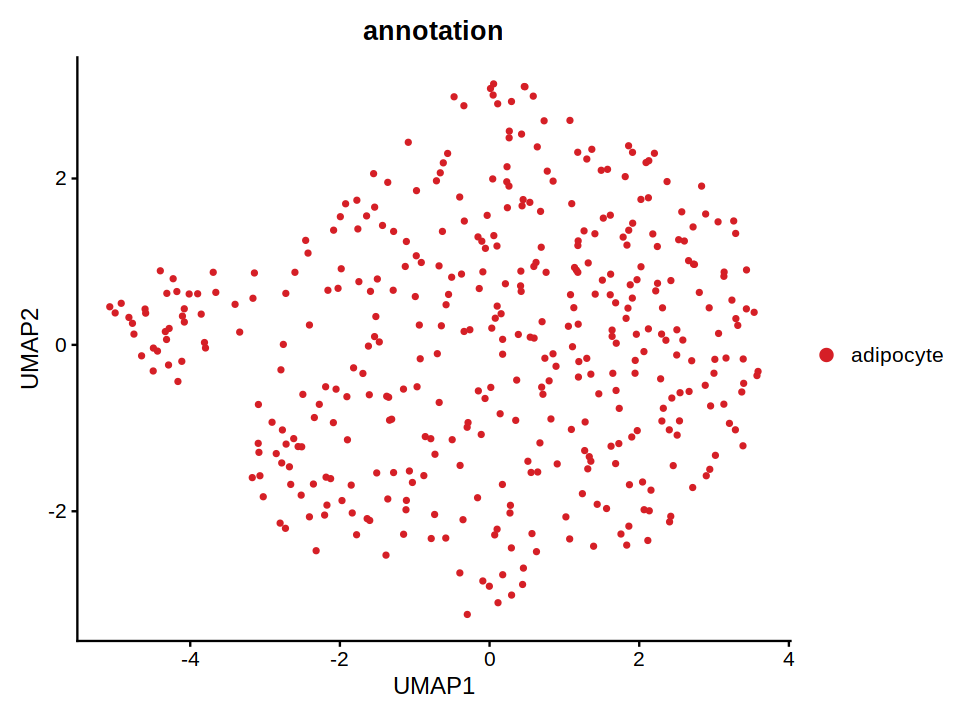

In [5]:
cols.states <- ArchR::paletteDiscrete(obj.rna@meta.data[, "annotation"])

p <- DimPlot(obj.rna, group.by = "annotation", label = FALSE,
             reduction = "umap_harmony", shuffle = TRUE) +
    scale_color_manual(values = cols.states) +
    xlab("UMAP1") + ylab("UMAP2")

options(repr.plot.height = 6, repr.plot.width = 8)

p

In [ ]:
# meta.data <- as.data.frame(coembed@meta.data)

In [ ]:
# df_plot <-  meta.data %>%
#     group_by(patient, annotation) %>%
#     summarise(counts = n()) %>%
#     mutate(cell_proportion = counts / sum(counts))

# p1 <- ggplot(df_plot, aes(patient, cell_proportion, fill=annotation)) + 
#     geom_bar(stat="identity", position = position_stack(reverse = TRUE)) +
#     scale_fill_manual(values = cols.states) +
#     theme_cowplot() +
#     xlab("") + ylab("") +
#     theme(axis.text.x = element_text(angle = 60, hjust = 1))


# options(repr.plot.width = 10, repr.plot.height = 6)

# p1

In [ ]:
# df_plot <- meta.data %>%
#     group_by(region, annotation) %>%
#     summarise(counts = n()) %>%
#     mutate(cell_proportion = counts / sum(counts))

# p1 <- ggplot(df_plot, aes(region, cell_proportion, fill=annotation)) + 
#     geom_bar(stat="identity", position = position_stack(reverse = TRUE)) +
#     scale_fill_manual(values = cols.states) +
#     theme_cowplot() +
#     xlab("") + ylab("") +
#     theme(axis.text.x = element_text(angle = 60, hjust = 1))


# options(repr.plot.width = 10, repr.plot.height = 6)

# p1

In [ ]:
# df_plot <- meta.data %>%
#     group_by(patient_group, annotation) %>%
#     summarise(counts = n()) %>%
#     mutate(cell_proportion = counts / sum(counts))

# p1 <- ggplot(df_plot, aes(patient_group, cell_proportion, fill=annotation)) + 
#     geom_bar(stat="identity", position = position_stack(reverse = TRUE)) +
#     scale_fill_manual(values = cols.states) +
#     theme_cowplot() +
#     xlab("") + ylab("") +
#     theme(axis.text.x = element_text(angle = 60, hjust = 1))


# options(repr.plot.width = 6, repr.plot.height = 6)

# p1

In [ ]:
# df_plot <- meta.data %>% 
#             group_by(patient_region_id, annotation) %>%
#             summarise(counts = n()) %>%
#             mutate(proportion = counts / sum(counts))

# df_anno <- coembed@meta.data %>%
#     as.data.frame() %>%
#     subset(., select = c("patient_region_id", "patient_group")) %>%
#     unique()

# df_plot <- merge.data.frame(df_plot, df_anno)
    
#     p <- ggplot(data = df_plot, aes(x = patient_group, y = proportion)) +
#     geom_boxplot2(aes(color = patient_group)) +
#     geom_point(aes(color = patient_group), position = position_jitterdodge(), size = 3) +
#     facet_wrap(~annotation, nrow = 1) +
#     stat_compare_means(comparisons = list(c("group_1", "group_2"),
#                                          c("group_2", "group_3"),
#                                          c("group_1", "group_3")),
#                    method = "wilcox.test") +
#     theme_cowplot() +
#     xlab("") + ylab("") +
#     theme(axis.text.x = element_blank(),
#          legend.title = element_blank())

# options(repr.plot.width = 15, repr.plot.height = 5)

# print(p)

In [ ]:
# Idents(coembed) <- "annotation"

In [ ]:
# all.markers <- FindAllMarkers(coembed, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
    
# df <- all.markers %>%
#     group_by(cluster) %>%
#     slice_max(n = 10, order_by = avg_log2FC)

# p <- DotPlot(coembed, features = unique(df$gene)) + RotatedAxis()
    
# options(repr.plot.height = 5, repr.plot.width = 18)

# print(p)

In [ ]:
# if(!dir.exists("../data/coembed/MarkerGenesAfterAnnotation")){
#     dir.create("../data/coembed/MarkerGenesAfterAnnotation")
# }

In [ ]:
# markerList <- split(all.markers, all.markers$cluster)
    
#     for(i in 1:length(markerList)){
#         markerList[[i]] <- markerList[[i]][order(-markerList[[i]]$avg_log2FC), ]
#     }
    
#     WriteXLS::WriteXLS(markerList,
#                    ExcelFileName = glue::glue("../data/coembed/MarkerGenesAfterAnnotation/annotation.xlsx"),
#                    SheetNames = names(markerList))

# saveRDS(all.markers, glue::glue("../data/coembed/MarkerGenesAfterAnnotation/annotation.rds"))

In [ ]:
saveRDS(obj.rna, file = "../data/snRNA/snRNA.annotation.Rds")

In [ ]:
sessionInfo()